<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/2-Deep-Neural-Networks2_8_ANN_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><a href='https://shangeth.com/google-ml-academy/'>Google ML Academy 2019</a></h1>
<h3>Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3>
<hr>

We will use ANNs for a basic computer vision application of image classification on CIFAR10 Dataset

# Dataset

## CIFAR-10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

![](https://miro.medium.com/max/824/1*SZnidBt7CQ4Xqcag6rd8Ew.png)

## Download the Dataset

Tensorflow has inbuilt dataset which makes it easy to get training and testing data.

In [0]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

## Visualize the Dataset

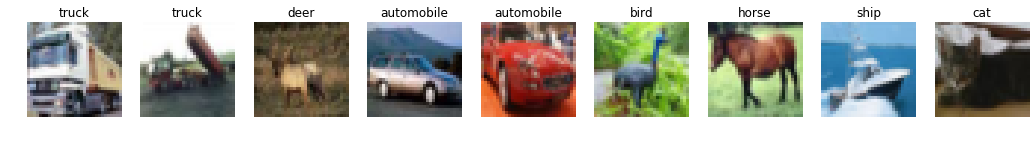

In [45]:
import matplotlib.pyplot as plt

num_imgs = 10
plt.figure(figsize=(num_imgs*2,3))

for i in range(1,num_imgs):
    plt.subplot(1,num_imgs,i).set_title('{}'.format(class_name[y_train[i][0]]))
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

## Scaling Features


In [46]:
import numpy as np

np.max(x_train), np.min(x_train)

(255, 0)

The range of values in the data is 0-255, 
-  we can to scale it to [0,1], dividing it by 255 will do.
- or we can standardize it by subtracting mean and dividing std.

In [47]:
mean = np.mean(x_train)
std = np.std(x_train)

x_train = (x_train-mean)/std
x_test = (x_test-mean)/std

np.max(x_train), np.min(x_train), np.max(x_test), np.min(x_test)

(2.09341038199596, -1.8816433721538972, 2.09341038199596, -1.8816433721538972)

## Labels to One-Hot

In [48]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [49]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Colour Channels

Lets check the shape of the arrays

In [50]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

The shape of each image is (32 x 32 x 3), previously we saw MNIST dataset had a shape of (28 x 28), why is it so?

MNIST is a gray-scale image, it has a single channel of gray scale. But CIFAR-10 is a colour image, every colour pixel has 3 channels RGB, all these 3 channels contribute to what colour you see.

Any colour image is made of 3 channels RGB.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPglxnipVI7q0wJx7Mb0yT8JodIgLs-O2rpwMDPgbZjHs-vLpQ)

## Visualize colour channels

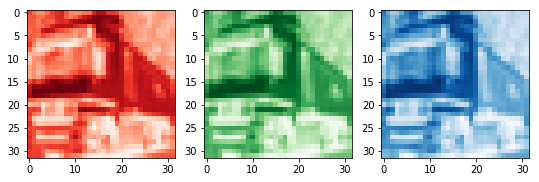

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(x_train[1][:,:,0], cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(x_train[1][:,:,1], cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(x_train[1][:,:,2], cmap='Blues')
plt.show()

So when we flatten the CIFAR-10 image, it will give 32x32x3 = 3072.

# Model

In [52]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (32,32,3) # 3072
nclasses = 10
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=1024), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units=512),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('softmax')
                             ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

## Training

In [53]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
tf_history_dp = model.fit(x_train, y_train, batch_size=500, epochs=100, verbose=True, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 57us/sample - loss: 2.2985 - acc: 0.2712 - val_loss: 1.7830 - val_acc: 0.3898
Epoch 2/100
50000/50000 [==============================] - 3s 53us/sample - loss: 1.9610 - acc: 0.3329 - val_loss: 1.7066 - val_acc: 0.4134
Epoch 3/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.8136 - acc: 0.3678 - val_loss: 1.6560 - val_acc: 0.4252
Epoch 4/100
50000/50000 [==============================] - 3s 52us/sample - loss: 1.7360 - acc: 0.3939 - val_loss: 1.6385 - val_acc: 0.4390
Epoch 5/100
50000/50000 [==============================] - 3s 52us/sample - loss: 1.6878 - acc: 0.4129 - val_loss: 1.6052 - val_acc: 0.4470
Epoch 6/100
50000/50000 [==============================] - 3s 51us/sample - loss: 1.6580 - acc: 0.4241 - val_loss: 1.5924 - val_acc: 0.4526
Epoch 7/100
50000/50000 [==============================] - 3s 51us/sample - loss: 1.6360 - acc: 0.4296 - val_l

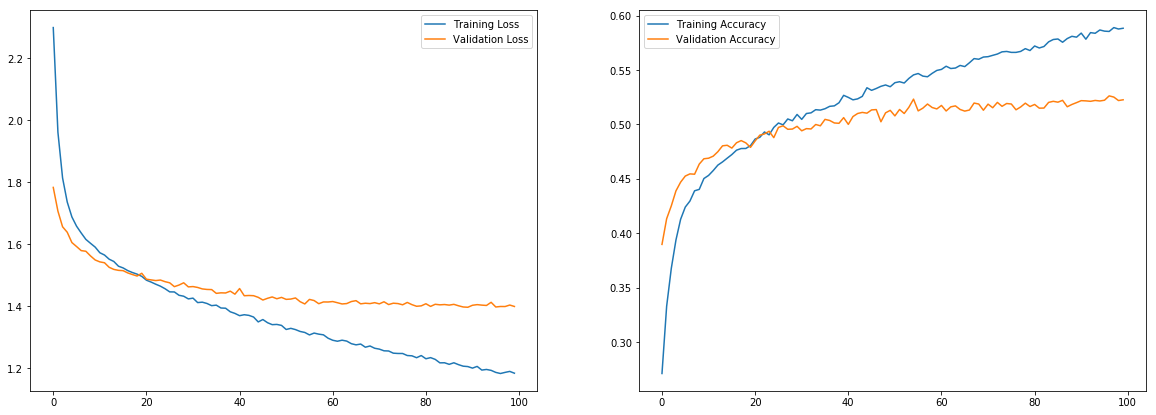

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history_dp.history['loss'], label='Training Loss')
plt.plot(tf_history_dp.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history_dp.history['acc'], label='Training Accuracy')
plt.plot(tf_history_dp.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

Model is clearly overfitting.

# Image Augmentation

We have discussed that, more images/data improves the model performance and avoid overfitting. But its not always possible to get new data, so we can augment the old data to create new data.

![](https://miro.medium.com/max/665/1*Jujct_Pt-zvdWtSFpHUp3Q.png)

Augmentation can be:
- random crop
- rotation
- horizontal and vertical flips
- x-y shift
- colour jitter
- etc.

## Image Augmentation in Tensorflow

In [0]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = (x_train-mean)/std
x_test = (x_test-mean)/std


num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [66]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (32,32,3) # 3072
nclasses = 10
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=1024), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units=512),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('softmax')
                             ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=20)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
        x_train, y_train,
        batch_size=200)

validation_generator = test_datagen.flow(
        x_test, y_test,
        batch_size=200)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

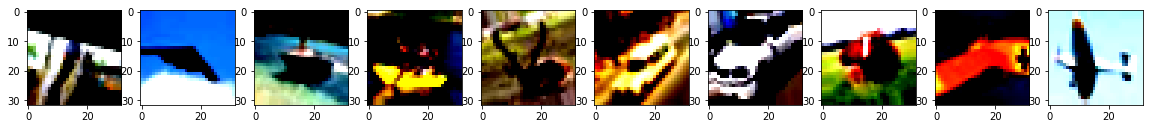

In [68]:
import matplotlib.pyplot as plt

i = 1
plt.figure(figsize=(20,2))
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=1):
    plt.subplot(1,10,i)
    plt.imshow(x_batch[0])
    i += 1
    if i>10:break

You can see the some of the images are zoomed, some are rotated...etc. SO these images are now different that the original image and for the model these are new images.

In [69]:
optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=200,
        validation_data=validation_generator)

Epoch 1/200
100/100 [==============================] - 11s 113ms/step - loss: 2.1187 - acc: 0.2506 - val_loss: 1.8658 - val_acc: 0.3438
Epoch 2/200
100/100 [==============================] - 11s 105ms/step - loss: 1.9376 - acc: 0.3195 - val_loss: 1.8019 - val_acc: 0.3725
Epoch 3/200
100/100 [==============================] - 10s 105ms/step - loss: 1.9161 - acc: 0.3307 - val_loss: 1.7636 - val_acc: 0.3895
Epoch 4/200
100/100 [==============================] - 10s 104ms/step - loss: 1.8643 - acc: 0.3490 - val_loss: 1.7398 - val_acc: 0.3979
Epoch 5/200
100/100 [==============================] - 11s 106ms/step - loss: 1.8524 - acc: 0.3550 - val_loss: 1.7182 - val_acc: 0.4081
Epoch 6/200
100/100 [==============================] - 10s 105ms/step - loss: 1.8332 - acc: 0.3602 - val_loss: 1.7020 - val_acc: 0.4111
Epoch 7/200
100/100 [==============================] - 10s 105ms/step - loss: 1.8115 - acc: 0.3679 - val_loss: 1.6914 - val_acc: 0.4167
Epoch 8/200
100/100 [===========================

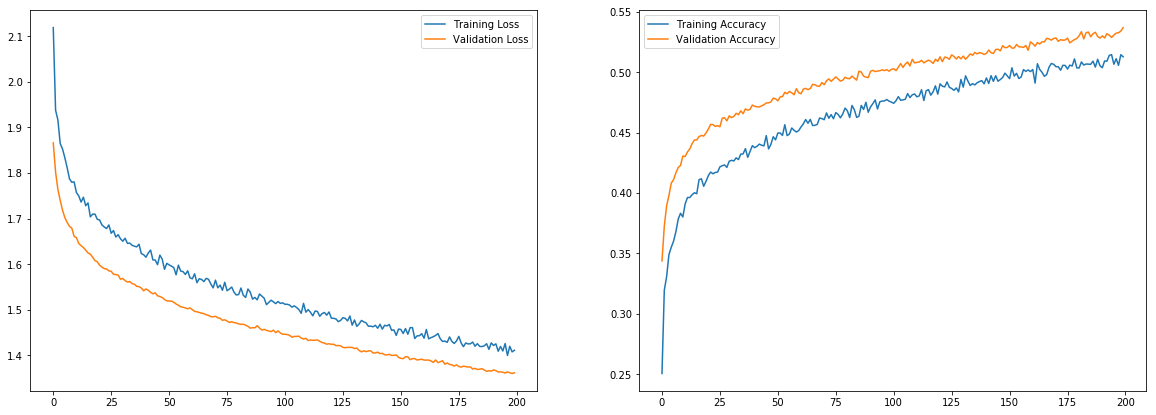

In [73]:
import matplotlib.pyplot as plt

tf_history_aug = model.history

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history_aug.history['loss'], label='Training Loss')
plt.plot(tf_history_aug.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history_aug.history['acc'], label='Training Accuracy')
plt.plot(tf_history_aug.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

The model is not overfitting and the performance is still increasing, so training for more epoch can give a good performance, but it will take more time, so we will stop here. Try to improve the model.

- Train the model longer.
- Use different architecture with aug
- use different activation
- different optimizer

There are other model architectures which work good for images, we will discuss that in the intermediate track.


# Saving a Trained Model

Saving a trained model is very important, hours of training should not be wasted and we need the trained model to be deployed in some other device. Its very simple in tf.keras

In [0]:
model_path = 'cifar10_trained_model.h5'

model.save(model_path)

In [75]:
!ls

cifar10_trained_model.h5  sample_data


# Loading a saved model

In [77]:
from tensorflow.keras.models import load_model

model = load_model(model_path)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0